# **Tackling climate crisis with machine learning: Water temperature prediction using 60 years of oceanographic data**

Increasing ocean temperatures severely affect marine species and ecosystems. Rising temperatures can contribute to coral bleaching and the loss of breeding grounds for marine fishes and mammals. Machine learning can be useful to predict what contributes to water temperature increase and to mitigate the rising temperatures in a timely fashion.

For this experiment, I used the California Cooperative Oceanic Fisheries Investigations (CalCOFI) dataset that comprises of 60 years of oceanographic data, hosted on Kaggle: https://www.kaggle.com/sohier/calcofi

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes data on temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity. Here I will focus on what predicts water temperature by using machine learning. Let’s start with importing the libraries and the data!


# Our Approach Towards Project

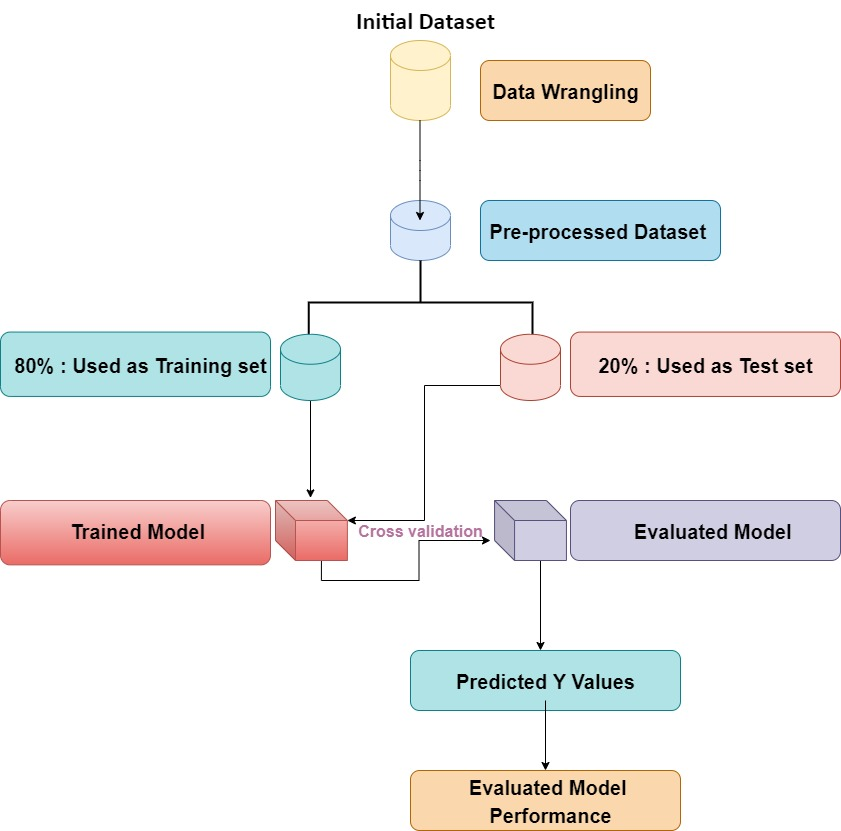

### In this project I  will explain how to i build a linear regression model in Julia, with full-fledged post model-building diagnostics.

#### The goal is to predict how water temprature is related to other features.  Let’s see how to do it in Julia.

## 1. Import Packages and setup environment
Importing all the packages in the first step is always a good practice. So let’s load the packages here itself and enable printing max of 1000 columns in Jupyter cell.

In [1]:
# Import Packages
using Pkg  # Package to install new packages

# Install packages 
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("RDatasets")

   Updating registry at `C:\Users\HP\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\HP\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\HP\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\HP\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\HP\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\HP\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\HP\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\HP\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\HP\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\HP\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\HP\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\HP\.julia\environments\v1.5\Project.toml`
No Changes to

In [2]:
# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase
using RDatasets
using Random

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [3]:
# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

### **Load Data**
##### Let’s read the data using CSV.file function and later convert it to DataFrame object

In [5]:
Ocean_df = CSV.read("C:\\Users\\HP\\Downloads\\bottle.csv");

##### Printing First Five Rows

In [6]:
first(Ocean_df,5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
,Int64,Int64,String,String,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,String?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,missing,25.649,missing,missing,missing,3,1,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,0.0,10.5,10.5,33.44,25.64,233.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,missing
2,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,missing,25.656,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,8.0,10.46,10.46,33.44,25.65,232.5,0.01,missing,missing,missing,missing,missing,missing,missing,missing,missing,8,missing,missing,missing,missing,missing,missing,missing,missing
3,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,missing,25.654,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,10.46,10.46,33.437,25.65,232.8,0.02,missing,missing,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
4,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,missing,25.643,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,19.0,10.45,10.45,33.42,25.64,234.1,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,19,missing,missing,missing,missing,missing,missing,missing,missing
5,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,missing,25.643,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,20.0,10.45,10.45,33.421,25.64,234.0,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,20,missing,missing,missing,missing,missing,missing,missing,missing


##### Printing Last Five Rows

In [7]:
last(Ocean_df,5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
,Int64,Int64,String,String,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,String?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.8706,108.74,253.47,missing,7,2,missing,3,missing,missing,missing,missing,missing,0.905,missing,0.176,missing,0.22,missing,1.77,missing,0.029,missing,0.1,missing,0.02,missing,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,0.0,18.74,18.74,33.408,23.871,402.4,0.0,5.81,108.7,1.8,0.22,0.1,0.03,0.02,0.91,0.18,0,missing,missing,missing,missing,missing,missing,missing,missing
2,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.8707,108.74,253.47,4,3,2,missing,3,missing,missing,missing,missing,missing,0.905,missing,0.176,missing,0.22,missing,1.77,missing,0.029,missing,0.1,missing,0.0,4,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,0.0,0.91,0.18,2,4,missing,missing,missing,missing,missing,missing,missing
3,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.415,5.796,23.8891,108.46,253.06,3,3,2,missing,3,missing,missing,missing,missing,missing,0.915,missing,0.182,missing,0.2,missing,1.75,missing,0.027,missing,0.09,missing,0.0,4,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,5.0,18.69,18.69,33.415,23.889,400.8,0.02,5.8,108.5,1.8,0.2,0.1,0.03,0.0,0.92,0.18,5,3,missing,missing,missing,missing,missing,missing,missing
4,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.0143,107.74,253.92,2,3,2,missing,3,missing,missing,missing,missing,missing,1.078,missing,0.313,missing,0.25,missing,1.99,missing,0.03,missing,0.11,missing,0.12,missing,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,18.16,18.16,33.406,24.014,389.1,0.04,5.82,107.7,2.0,0.25,0.1,0.03,0.12,1.08,0.31,10,2,missing,missing,missing,missing,missing,missing,missing
5,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.388,5.774,24.153,105.66,252.08,1,3,2,missing,3,missing,missing,missing,missing,missing,2.118,missing,0.614,missing,0.31,missing,2.58,missing,0.054,missing,0.14,missing,0.07,missing,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,15.0,17.53,17.53,33.388,24.153,376.0,0.059,5.77,105.7,2.6,0.31,0.1,0.05,0.07,2.12,0.61,15,1,missing,missing,missing,missing,missing,missing,missing


# 2. Data Exploration
### Before directly jumping to the model building, exploring the data is important. You should check what’s the size of the data frame. If it contains some missing values or outliers.

## **Summary of the dataframe**

In [8]:
println(size(Ocean_df))

describe(Ocean_df)

(864863, 74)


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Cst_Cnt,17138.8,1,16848.0,34404,,,Int64
2,Btl_Cnt,432432.0,1,432432.0,864863,,,Int64
3,Sta_ID,,001.0 168.0,,176.7 030.0,2634,,String
4,Depth_ID,,19-4903CR-HY-060-0930-05400560-0000A-3,,20-1611SR-PR-324-1700-07670700-0516A-3,864850,,String
5,Depthm,226.832,0,125.0,5351,,,Int64
6,T_degC,10.7997,1.44,10.06,31.14,,10963,"Union{Missing, Float64}"
7,Salnty,33.8404,28.431,33.863,37.034,,47354,"Union{Missing, Float64}"
8,O2ml_L,3.39247,-0.01,3.44,11.13,,168662,"Union{Missing, Float64}"
9,STheta,25.8194,20.934,25.996,250.784,,52689,"Union{Missing, Float64}"


#### By looking at the description, it looks like there are few spaces and special characters in the column names.

#### Let’s check the column names of the data frame. It’s a good practice to avoid spaces, special characters in the column names.

In [9]:
# Check column names
(names(Ocean_df))

74-element Array{String,1}:
 "Cst_Cnt"
 "Btl_Cnt"
 "Sta_ID"
 "Depth_ID"
 "Depthm"
 "T_degC"
 "Salnty"
 "O2ml_L"
 "STheta"
 "O2Sat"
 "Oxy_µmol/Kg"
 "BtlNum"
 "RecInd"
 ⋮
 "R_NH4"
 "R_CHLA"
 "R_PHAEO"
 "R_PRES"
 "R_SAMP"
 "DIC1"
 "DIC2"
 "TA1"
 "TA2"
 "pH2"
 "pH1"
 "DIC Quality Comment"

### If we remember our problem set, we can see all 74 attributed don't play an important in predicting  Water Temperature

# Let’s see which variables play a more important role in predicting water temperature.

(I will be focusing on some of the variables for now, so lets slice the dataframe.)

#### We can see that 7 variables seem to correlate better with temperature. Yet, we will remove one of the seven, as it refers to bottle number, and is not an important variable (BtlNum). We will keep 6 parameters in our model and remove the other variables.

#### Kept: 'Depthm', 'Salnty', 'O2mlL', 'STheta', 'O2Sat', 'Oxyµmol/Kg',

#### Removed: 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'BtlNum'

#### As you can see, there are 6 columns. Our target variable will be T_degC, which represents water temperature. Rest of the columns will be used for predicting the water temperature (target variable). Therefore, it is multi-various.

In [10]:
calcofi_subset = Ocean_df[:,[:T_degC ,:Salnty,:Depthm,:O2ml_L, :STheta, :O2Sat]] # :Oxy_µmol/Kg]]

,T_degC,Salnty,Depthm,O2ml_L,STheta,O2Sat
,Float64?,Float64?,Int64,Float64?,Float64?,Float64?
1,10.5,33.44,0,missing,25.649,missing
2,10.46,33.44,8,missing,25.656,missing
3,10.46,33.437,10,missing,25.654,missing
4,10.45,33.42,19,missing,25.643,missing
5,10.45,33.421,20,missing,25.643,missing
6,10.45,33.431,30,missing,25.651,missing
7,10.45,33.44,39,missing,25.658,missing
8,10.24,33.424,50,missing,25.682,missing
9,10.06,33.42,58,missing,25.71,missing


#### By looking at the description, it looks like there are few spaces and special characters in the column names.

#### Let’s check the column names of the data frame. It’s a good practice to avoid spaces, special characters in the column names.

In [11]:
names(calcofi_subset)

6-element Array{String,1}:
 "T_degC"
 "Salnty"
 "Depthm"
 "O2ml_L"
 "STheta"
 "O2Sat"

In [12]:
rename!(calcofi_subset,Symbol("T_degC")=>:Temprature_degC)
rename!(calcofi_subset,Symbol("Salnty")=>:Salinity)
rename!(calcofi_subset,Symbol("Depthm")=>:Depth_mtr)
rename!(calcofi_subset,Symbol("O2ml_L")=>:O2_ml_per_ltr)

,Temprature_degC,Salinity,Depth_mtr,O2_ml_per_ltr,STheta,O2Sat
,Float64?,Float64?,Int64,Float64?,Float64?,Float64?
1,10.5,33.44,0,missing,25.649,missing
2,10.46,33.44,8,missing,25.656,missing
3,10.46,33.437,10,missing,25.654,missing
4,10.45,33.42,19,missing,25.643,missing
5,10.45,33.421,20,missing,25.643,missing
6,10.45,33.431,30,missing,25.651,missing
7,10.45,33.44,39,missing,25.658,missing
8,10.24,33.424,50,missing,25.682,missing
9,10.06,33.42,58,missing,25.71,missing


# Now we will preprocess the data. First, we start with detecting missing values.

In [13]:
describe(calcofi_subset)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Union…,Type
1,Temprature_degC,10.7997,1.44,10.06,31.14,,10963,"Union{Missing, Float64}"
2,Salinity,33.8404,28.431,33.863,37.034,,47354,"Union{Missing, Float64}"
3,Depth_mtr,226.832,0,125.0,5351,,,Int64
4,O2_ml_per_ltr,3.39247,-0.01,3.44,11.13,,168662,"Union{Missing, Float64}"
5,STheta,25.8194,20.934,25.996,250.784,,52689,"Union{Missing, Float64}"
6,O2Sat,57.1038,-0.1,54.4,214.1,,203589,"Union{Missing, Float64}"


In [14]:
dropmissing!(calcofi_subset,[:Temprature_degC,:Salinity,:Depth_mtr,:O2_ml_per_ltr, :STheta, :O2Sat])

,Temprature_degC,Salinity,Depth_mtr,O2_ml_per_ltr,STheta,O2Sat
,Float64,Float64,Int64,Float64,Float64,Float64
1,10.3,33.03,0,5.9,25.364,92.8
2,18.46,32.92,6,6.02,23.568,111.8
3,10.29,32.951,10,6.04,25.304,95.0
4,10.29,32.99,15,6.06,25.335,95.3
5,10.33,33.005,20,6.04,25.339,95.1
6,10.39,33.054,30,6.01,25.368,94.8
7,10.4,33.06,31,6.01,25.371,94.8
8,10.36,33.15,47,5.78,25.448,91.1
9,10.35,33.167,50,5.76,25.463,90.8


# We can now start building our Machine learning model.

### We will create a model with the following steps:

## 1. ->  Prepare the dataset for training
## 2. ->  Create a linear regression model
## 3. ->  Train the model to fit the data
## 4. ->  Make predictions using the trained model

In [15]:
calcofi_subset

,Temprature_degC,Salinity,Depth_mtr,O2_ml_per_ltr,STheta,O2Sat
,Float64,Float64,Int64,Float64,Float64,Float64
1,10.3,33.03,0,5.9,25.364,92.8
2,18.46,32.92,6,6.02,23.568,111.8
3,10.29,32.951,10,6.04,25.304,95.0
4,10.29,32.99,15,6.06,25.335,95.3
5,10.33,33.005,20,6.04,25.339,95.1
6,10.39,33.054,30,6.01,25.368,94.8
7,10.4,33.06,31,6.01,25.371,94.8
8,10.36,33.15,47,5.78,25.448,91.1
9,10.35,33.167,50,5.76,25.463,90.8


## Outlier Analysis using Box Plot

### Outlier is a data point or set of data points that differ significantly from other observations in the complete dataset.

### Linear Regression works well when there aren’t any outliers present in the data. Let’s check out the outliers in y variable i.e. Water Temprature (Temprature_degC)

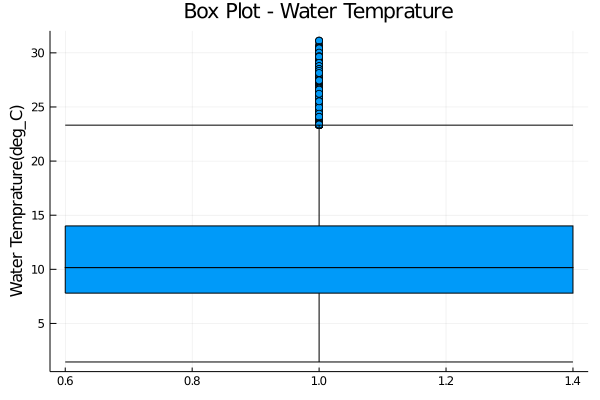

In [16]:
boxplot(calcofi_subset.Temprature_degC , title = "Box Plot - Water Temprature", ylabel = "Water Temprature(deg_C)", legend = false)

There are many outliers in the data, represented by the points below the bottom leaf. Let’s remove these data points.

In [17]:
# Outlier removal -above
first_percentile = percentile(calcofi_subset.Temprature_degC, 95)
iqr_value = iqr(calcofi_subset.Temprature_degC)
calcofi_subset = calcofi_subset[calcofi_subset.Temprature_degC .<  (first_percentile - 1.5*iqr_value),:];

In [18]:
# Outlier removal -below
first_percentile = percentile(calcofi_subset.Temprature_degC, 25)
iqr_value = iqr(calcofi_subset.Temprature_degC)
calcofi_subset = calcofi_subset[calcofi_subset.Temprature_degC .>  (first_percentile - 1.5*iqr_value),:];

## Distribution Analysis using Density Plot
###  Linear Regression works well when the y variable is normally distributed or close to normal distribution. Let’s check out the distribution of y variable i.e. Water Temprature (Temprature_degC)

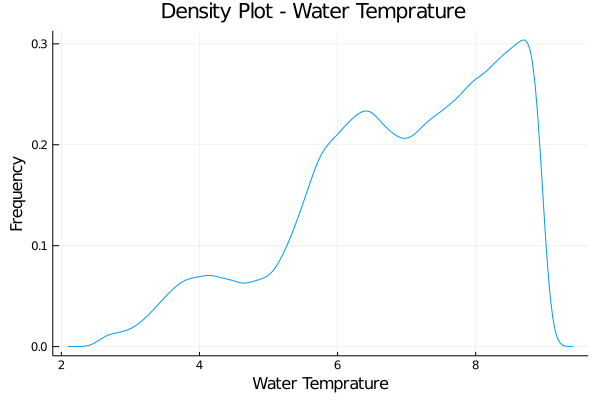

In [19]:
# Density Plot
density(calcofi_subset.Temprature_degC , title = "Density Plot - Water Temprature  ", ylabel = "Frequency", xlabel = "Water Temprature", legend = false)

The distribution does have a couple of mini peaks, which is indicative of a mixture of distributions. However, the overall distribution does have a bell curve.

#### Cross Checking

In [20]:
maximum(calcofi_subset.Temprature_degC)

8.965

In [21]:
minimum(calcofi_subset.Temprature_degC)

2.54

In [22]:
median(calcofi_subset.Temprature_degC)

7.08

In [23]:
describe(calcofi_subset)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Temprature_degC,6.88256,2.54,7.08,8.965,,,Float64
2,Salinity,34.1769,32.122,34.182,35.28,,,Float64
3,Depth_mtr,420.318,0,378.0,3200,,,Int64
4,O2_ml_per_ltr,1.38522,-0.01,1.05,7.16,,,Float64
5,STheta,26.7799,24.939,26.778,28.083,,,Float64
6,O2Sat,20.6188,-0.1,15.4,109.0,,,Float64


## Correlation Analysis using Scatter Plot

#### Linear Regression works well when the y variable is linearly correlated to the x variable. Let’s check out the correlation coefficient and scatter plot

In [24]:
# Setting Data
Target = calcofi_subset[!, :Temprature_degC	];
Salinity = calcofi_subset[!, :Salinity];



Correlation of Water Salanity and Water Temprature is -0.5888201733936442


P = Plot{Plots.PyPlotBackend() n=1}


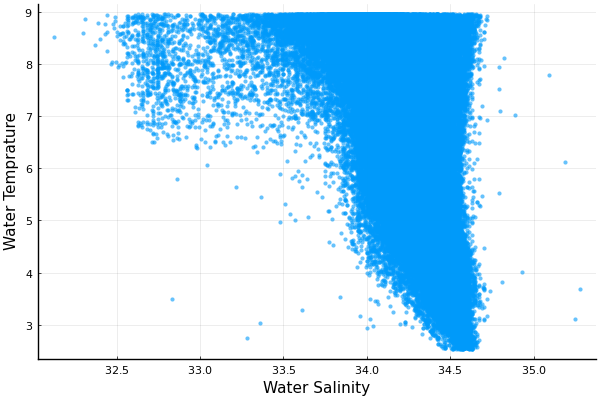

In [25]:
# Correlation Analysis

println("Correlation of Water Salanity and Water Temprature is ", cor(calcofi_subset.Temprature_degC,calcofi_subset.Salinity), "\n\n")

# Scatter Plots
 Plots.pyplot()

P = scatter(Salinity,Target,labels=false,markerstrokewidth=0,markersize=3,alpha=0.6,)
xlabel!("Water Salinity")
ylabel!("Water Temprature")
@show P

The two features look linearly correlated. There are still a few chunk of points which are having different behaviour.

Some other feature might be able to explain this relation. You will see it while building the regression model with multiple features

# 3. Data Preprocessing
### Data Preprocessing is one of the most important steps in model building. The data is already treated for outliers and column names. Let’s look at the categorical columns now.

## Train-Test Split

#### Split the data to train and test set.

In [26]:
# Train test split
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(calcofi_subset,0.75)

LoadError: UndefVarError: dfTrainTestSplit not defined

In [27]:
function partitionTrainTest(calcofi_subset, at = 0.7)
    n = nrow(calcofi_subset)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    calcofi_subset[train_idx,:], calcofi_subset[test_idx,:]
end

partitionTrainTest (generic function with 2 methods)

In [28]:
# iris = dataset("datasets", "calcofi_subset")
 train,test = partitionTrainTest(calcofi_subset, 0.7)

(169096×6 DataFrame
│ Row    │ Temprature_degC │ Salinity │ Depth_mtr │ O2_ml_per_ltr │ STheta  │ O2Sat   │
│        │ Float64         │ Float64  │ Int64     │ Float64       │ Float64 │ Float64 │
├────────┼─────────────────┼──────────┼───────────┼───────────────┼─────────┼─────────┤
│ 1      │ 8.2             │ 34.032   │ 229       │ 2.59          │ 26.488  │ 39.1    │
│ 2      │ 7.02            │ 34.066   │ 300       │ 1.93          │ 26.684  │ 28.4    │
│ 3      │ 8.77            │ 33.898   │ 191       │ 3.36          │ 26.295  │ 51.4    │
│ 4      │ 7.7             │ 34.004   │ 284       │ 3.18          │ 26.54   │ 47.5    │
│ 5      │ 6.93            │ 34.06    │ 300       │ 1.96          │ 26.692  │ 28.7    │
│ 6      │ 3.72            │ 34.495   │ 1100      │ 0.66          │ 27.421  │ 9.0     │
│ 7      │ 8.41            │ 34.085   │ 250       │ 2.28          │ 26.498  │ 34.6    │
│ 8      │ 6.32            │ 34.08    │ 377       │ 1.3           │ 26.79   │ 18.8    │
│ 9      │ 7

# 4. Model Building

#### Built the linear regression model using “GLM” package. 

#### Let’s start with 1 variable.

**To train a linear regression model, use the lm() function that accepts a formula object as the first argument. Use the @formula to create the required formula object.**

In [29]:
fm = @formula(Temprature_degC ~ Salinity)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Temprature_degC ~ 1 + Salinity

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error        t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  147.617     0.466283    316.58    <1e-99  146.703    148.531
Salinity      -4.11781   0.0136426  -301.83    <1e-99   -4.14455   -4.09107
───────────────────────────────────────────────────────────────────────────

# 5. Model Dignostics

###    I. P Value
###    II. T Statistic
###   III. R Square

## P-value

A variable in linear regression model is said to be statistically significant only if the p-value is less than a pre-determined statistical significance level, which usually is 0.05.

In the above case only one feature is used to build the model. So there would be 2 p-values, one for the feature and one for the intercept. Both of these are less than 0.05, and hence statistically significant.

## The T value
The t value is the statistic metric calculated by dividing the beta coefficient (weight of the X variable) by its standard error. When I say, standard error, it is an estimate of the deviation of the beta coefficient.

A larger t-value indicates that it is less likely that the coefficient is not equal to zero purely by chance. So, the higher the t-value, the better.

## R Square
R-Square is a statistical measure which tells us the proportion of variation in the dependent (y) variable that is explained by different features (independent variables) in this model.

Higher the value of R-Square, the better. The max it can go is 1.

In [30]:
# R Square value of the model
r2(linearRegressor)


0.35013212309741737

# 6. Model Prediction and Performance

### 1. Mean Aboslute Error

### 2. Mean Absolute Percentage Error

### 3. Root Mean Square Error

### 4. Mean Squared Error

### 5. Error Distribution

**Let’s create the performance metrics. I would be looking at the performance metrics for both train data as well as test data.
Now that the model is ready, let’s predict on both the training and test data and cmopute squared errors.**

In [31]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)


169096-element Array{Union{Missing, Float64},1}:
 7.479731813371245
 7.339726335896529
 8.031518106947829
 7.595030441879771
 7.364433184862662
 5.573186634819194
 7.261487980837188
 7.282077021642294
 6.9897126422098665
 7.47561400521019
 5.964378410116041
 9.872178354923562
 7.566205784752611
 ⋮
 7.063833189108237
 6.059087997819461
 6.046734573336408
 7.722682494871378
 7.092657846235397
 7.07618661359129
 7.611501674523851
 6.244389365065359
 6.590285250590995
 6.22791813242128
 6.857942781057261
 7.339726335896529

In [32]:
# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Temprature_degC], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

72470-element Array{Float64,1}:
 1.442138530557181
 0.09664623069313706
 0.4344503100944404
 0.03062201387940767
 0.07468331968264218
 5.57909734328195
 0.42668415577775554
 0.13020607934338513
 0.40324974878137976
 0.23408130414998687
 6.275040303086628
 0.233509025393784
 6.055659651705927
 ⋮
 3.1111944717718107
 0.010299810254409443
 0.21401875506771018
 0.0030895676157532905
 0.479781605126718
 5.008375633018874
 0.30776782208771036
 5.9264485221506416
 2.071169516592985
 1.0943918242445272
 0.08770055431610771
 0.081214252781961

In [33]:
# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Temprature_degC], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

 ### **Now, let’s calculate the Mean Absolute Percentage Error (MAPE).**

In [34]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

###  Now calculate Root Mean Squared Error (RMSE)

In [35]:
# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

### The functions to compute errors is ready. Npow, let’s compute them on the test and training data.

##  Test  Error


In [36]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 0.9505318696856049

Mean Aboslute Percentage test error: 0.15656319400050922

Root mean square test error: 1.194811911276318

Mean square test error: 1.427575503327768



##  Train  Error


In [37]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Absolute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean train error: 0.948862035082614

Mean Absolute Percentage train error: 0.15696373078829412

Root mean square train error: 1.1896889576046077

Mean square train error: 1.4153598158463379



### Let’s see the residual error distribution. There’s shouldn’t be any pattern to the error and it should follow a normal distribution. I would be using a histogram for residual error analysis of both training as well as testing dataset

## Error Distribution

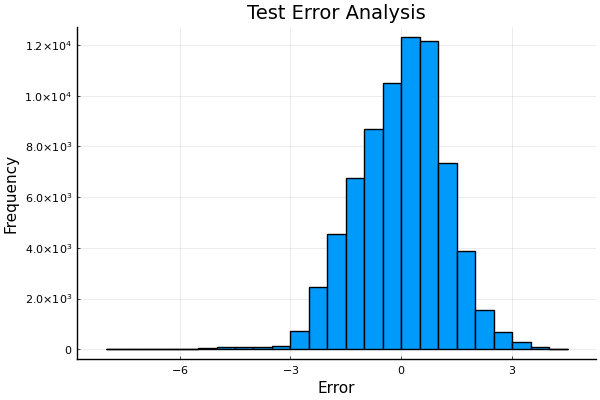

In [38]:
# Histogram of error to see if it's normally distributed  on test dataset
histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

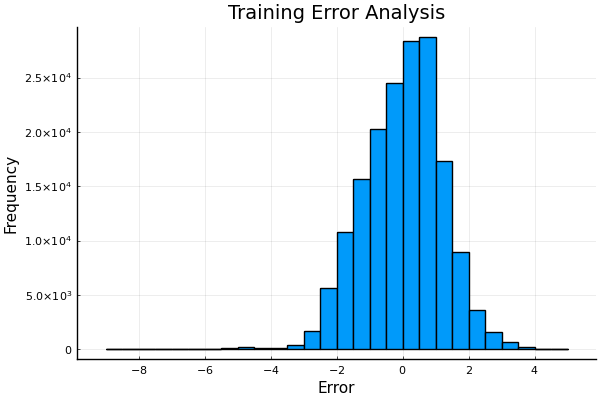

In [39]:
# Histogram of error to see if it's normally distributed  on train dataset
histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

### It’s almost normally distributed, but still few outliers are there. Now let’s look at the actual and predicted values using a scatter plot. There shouldn’t be any specific pattern to it.

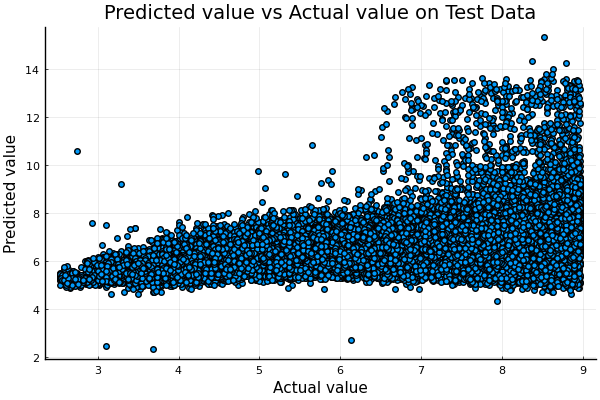

In [40]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)

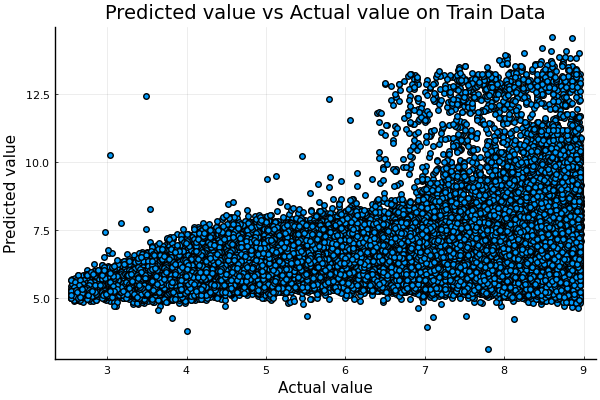

In [41]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)

# 7. Cross Validation

**Suppose, the model predicts satisfactorily on the 30% split (test data), is that enough to believe that your model will perform equally well all the time?**

**What do I mean by this?**

**A good model should perform equally well on new data (X vars) as it did on the training data. If the performance on new data (test data and any future data) deteriorates, it is an indication that the model may be overfit. That is, it is too complex that it explains the training data, but not general enough to perform as well on test.**

**So, it is important to rigorously cross validate the model’s performance as much as possible.**

**One way to do this rigorous testing, is to check if the model equation performs equally well when trained and tested on different mutually exclusive chunks of data.**

**That’s what cross validation is for.**

**Let’s see the implementation.**

In [42]:
# Cross Validation function defination
function cross_validation(train,k, fm = @formula(Temprature_degC ~ Salinity))
    a = collect(Kfold(size(train)[1], k))
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Temprature_degC], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
    end
end

cross_validation (generic function with 2 methods)

In [43]:
cross_validation(train,10)

Mean error for set 1 is 0.9481790968833409
Mean error for set 2 is 0.9512650464016034
Mean error for set 3 is 0.9318261452292441
Mean error for set 4 is 0.9450964621123725
Mean error for set 5 is 0.9552931048605594
Mean error for set 6 is 0.9516956437781883
Mean error for set 7 is 0.9499326374047242
Mean error for set 8 is 0.9497947893138972
Mean error for set 9 is 0.9565219844386
Mean error for set 10 is 0.9491411082907127


# 8.  Multiple Linear Regression with Julia
By now, i am having having better understanding of how to implement linear regression using only one independent variable in Julia. But in practical scenarios, there would be multiple independent variables. The core concepts I talked about would be the same. Let’s see the implementation.

I am using 7 features to build the regression model.

In [44]:
describe(calcofi_subset)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Temprature_degC,6.88256,2.54,7.08,8.965,,,Float64
2,Salinity,34.1769,32.122,34.182,35.28,,,Float64
3,Depth_mtr,420.318,0,378.0,3200,,,Int64
4,O2_ml_per_ltr,1.38522,-0.01,1.05,7.16,,,Float64
5,STheta,26.7799,24.939,26.778,28.083,,,Float64
6,O2Sat,20.6188,-0.1,15.4,109.0,,,Float64


In [45]:
fm = @formula(Temprature_degC ~ Salinity + Depth_mtr + O2_ml_per_ltr + STheta + O2Sat)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Temprature_degC ~ 1 + Salinity + Depth_mtr + O2_ml_per_ltr + STheta + O2Sat

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error         t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)     4.75092      0.0681947       69.67    <1e-99   4.61726       4.88458
Salinity        5.67171      0.00199951    2836.55    <1e-99   5.66779       5.67562
Depth_mtr      -0.000627412  1.91355e-6    -327.88    <1e-99  -0.000631163  -0.000623662
O2_ml_per_ltr   0.646268     0.00742972      86.98    <1e-99   0.631706      0.66083
STheta         -7.14654      0.00273194   -2615.92    <1e-99  -7.15189      -7.14118
O2Sat          -0.0464375    0.000498837   

### R Square value of the model


In [46]:
# R Square value of the model
r2(linearRegressor)

0.9982638235351768

The p-value, t value and R-Square value of all the features is statistically significant. So this is a good model from a diagnostics perspective. It’s better than the previous one. Let’s have a look at the performance of the model in prediction

## Model Prediction and Performance

In [47]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame
performance_testdf = DataFrame(y_actual = test[!,:Temprature_degC], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame
performance_traindf = DataFrame(y_actual = train[!,:Temprature_degC], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [48]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 0.04591992487820565

Mean Aboslute Percentage test error: 0.007453555097119694

Root mean square test error: 0.06045118778894079

Mean square test error: 0.0036543461050937845



In [49]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Aboslute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean train error: 0.04617055576169689

Mean Aboslute Percentage train error: 0.007532008377766387

Root mean square train error: 0.06149188804905418

Mean square train error: 0.0037812522958374124



The error has been decreased as compared to the previous model.

Let’s see the residual error distribution.

## Error Distribution

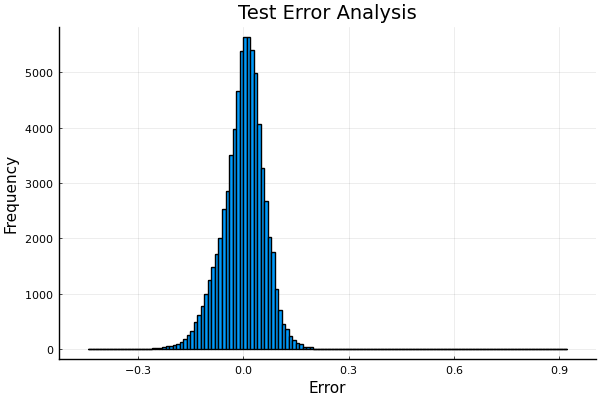

In [50]:
# Histogram of error to see if it's normally distributed  on test dataset
histogram(performance_testdf.error, bins = 150, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

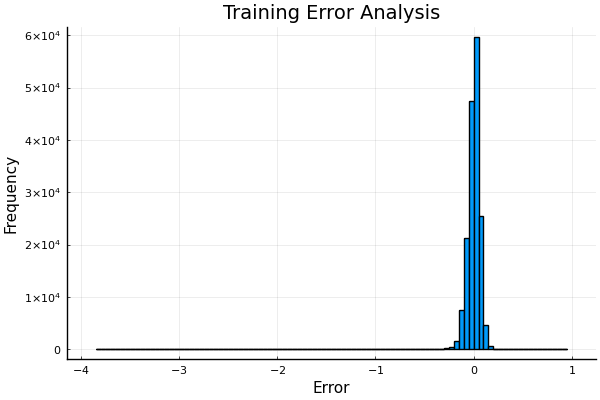

In [51]:
# Histogram of error to see if it's normally distributed  on train dataset
histogram(performance_traindf.error, bins = 150, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

It’s almost normally distributed, the error distribution is also better than the previous model. Let’s look at the predicted values using the scatter plot

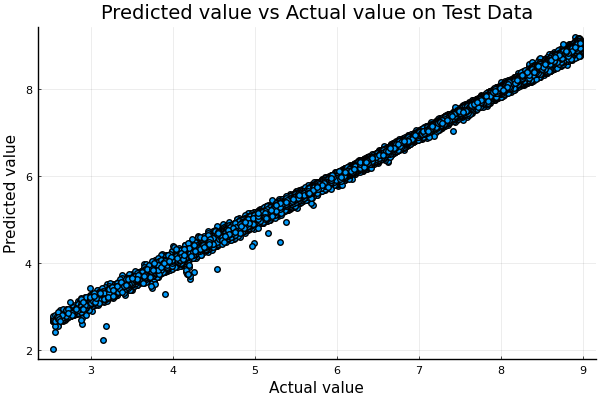

In [52]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)

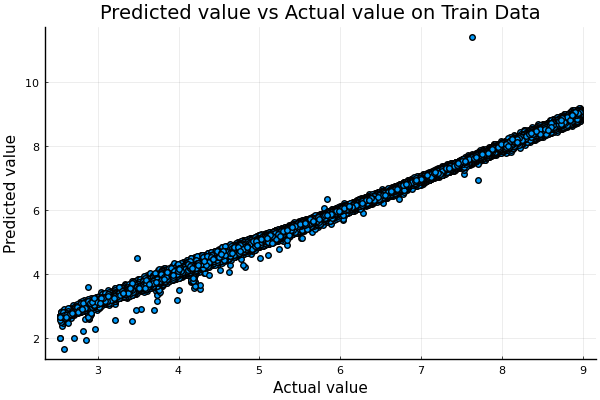

In [53]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)

The predictions are very close to the actual values. The pattern in a few data points has also been explained now by independent variables. Let’s have a look at the cross-validation score.

In [54]:
cross_validation(train,10, fm)

Mean error for set 1 is 0.046035665036089225
Mean error for set 2 is 0.045490236062310084
Mean error for set 3 is 0.04632431882588528
Mean error for set 4 is 0.04595469534110535
Mean error for set 5 is 0.046834554819353384
Mean error for set 6 is 0.04617065910518656
Mean error for set 7 is 0.04631329532155062
Mean error for set 8 is 0.04578031544223131
Mean error for set 9 is 0.046120137570588075
Mean error for set 10 is 0.0467132331018888


The error is not varying much. the model is not overfitted.

By looking at the different parameters and evaluation metrics, it can be concluded that the model is quite good.

Now let’s look at one of the very less knows but high-value topic in linear regression.

# 8. Influencial Points using Cook’s Distance

## Cook’s Distance

Cook’s distance is a measure computed with respect to a given regression model and therefore is impacted only by the X variables included in the model.

But, what does cook’s distance mean?

It computes the influence exerted by each data point (row) on the predicted outcome.

The cook’s distance for each observation i measures the change in Ŷ (fitted Y) for all observations with and without the presence of observation i, so we know how much the observation i impacted the fitted values.            
          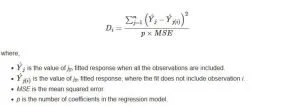

# Cook's Distance function definition
function cook_distance(train,n_coeff = 2, fm = @formula(Temprature_degC ~ Salinity))
    linearRegressor = lm(fm, train)

    # MSE calculation
    performance_traindf = DataFrame(y_actual = train[!,:Temprature_degC], y_predicted = predict(linearRegressor, train))
    performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
    performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error
    mse = mean(performance_traindf.error_sq)

    cooks_distance = []
    for i in 1:size(train)[1]
        total_rows = collect(1:size(train)[1])
        training_rows = deleteat!(total_rows, total_rows .== i)
        temp_train = train[training_rows,:]
        linearRegressor = lm(fm, temp_train)

        temp_performance_traindf = performance_traindf[training_rows,:]

        # Predicted Value
        ypredicted_train = predict(linearRegressor, temp_train)

        # Test Performance DataFrame
        performance_df = DataFrame(yi = temp_performance_traindf.y_predicted, yj = ypredicted_train)
        performance_df.y_diff = performance_df[!,:yi] - performance_df[!,:yj] 
        performance_df.y_diff_sq = performance_df.y_diff.*performance_df.y_diff
        cooks_d = sum(performance_df.y_diff_sq)/(n_coeff*mse)
        push!(cooks_distance,cooks_d)
    end
    cooks_distance_df = DataFrame(index = collect(1:size(train)[1]), cooks_d = cooks_distance )
    return cooks_distance_df
    end 

# Calculate Cook's Distance
cooks_distance_df = cook_distance(train, 9, fm)
mean_cooks_distance = mean(cooks_distance_df.cooks_d)
influencial_points = cooks_distance_df[cooks_distance_df.cooks_d .> 4*mean_cooks_distance,:]
println(mean_cooks_distance)

## Influence measures
In general use, those observations that have a cook’s distance greater than 4 times the mean may be classified as influential. This is not a hard boundary.

Let’s see these data points on the plot

plot = scatter(cooks_distance_df.index, cooks_distance_df.cooks_d, title = "Cook's Distance Analysis", ylabel = "Cook's Distance", xlabel = "Index",  label = ["Cook's Distance"], ylim = (0,0.03))
hline!([mean_cooks_distance], lw = 3,  label = ["Mean Cook's Distance"])
plot

Now let’s find out the influential rows from the original data. If you extract and examine each influential row 1-by-1 (from below output), you will be able to find reason out why that row turned out influential. It is likely that one of the X variables included in the model had extreme values.

high_cooksd_points = cooks_distance_df[cooks_distance_df.cooks_d .> 0.02,:]
influencial_points_df = train[high_cooksd_points.index,[:Salinity , :Depth_mtr , :O2_ml_per_ltr , :STheta , :O2Sat]]

# Conclusion

## 1. Ordinary Linear Regression Model

### Coefficients: 	Temprature_degC ~ 1 + Salinity

#### For this first model, we applied The Simple Linear Regression Model and used only one dependent variable i.e. Salinity.
#### And we can see that intercept of salinity is negative i.e.   -4.11781. That shows us that Salinity does not contribute to rising ocean temperature.

#### Now we look at the other model that we implement.


## 2. Multiple Linear Regression

### Coefficients: Temprature_degC ~ 1 + Salinity + Depth_mtr + O2_ml_per_ltr + STheta + O2Sat


#### For this first model, we applied the Multiple Linear Regression Model and used more than one dependent variable i.e. Salinity, Depth, O2 level/ml liter, etc.

#### And we can see that intercept of salinity here is positive i.e.   5.671771. That shows us that Salinity does contribute to rising ocean temperature when considered the other attributes. 
#### So, this model makes a better prediction.

#### Now we look at the other model that we implement.
